In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dat=load_boston()

In [3]:
df_X=pd.DataFrame(dat.data,columns=dat.feature_names)
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target=dat.target

In [6]:
df_X.shape

(506, 13)

In [8]:
df_X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
import seaborn as sns

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<Figure size 1440x1440 with 0 Axes>

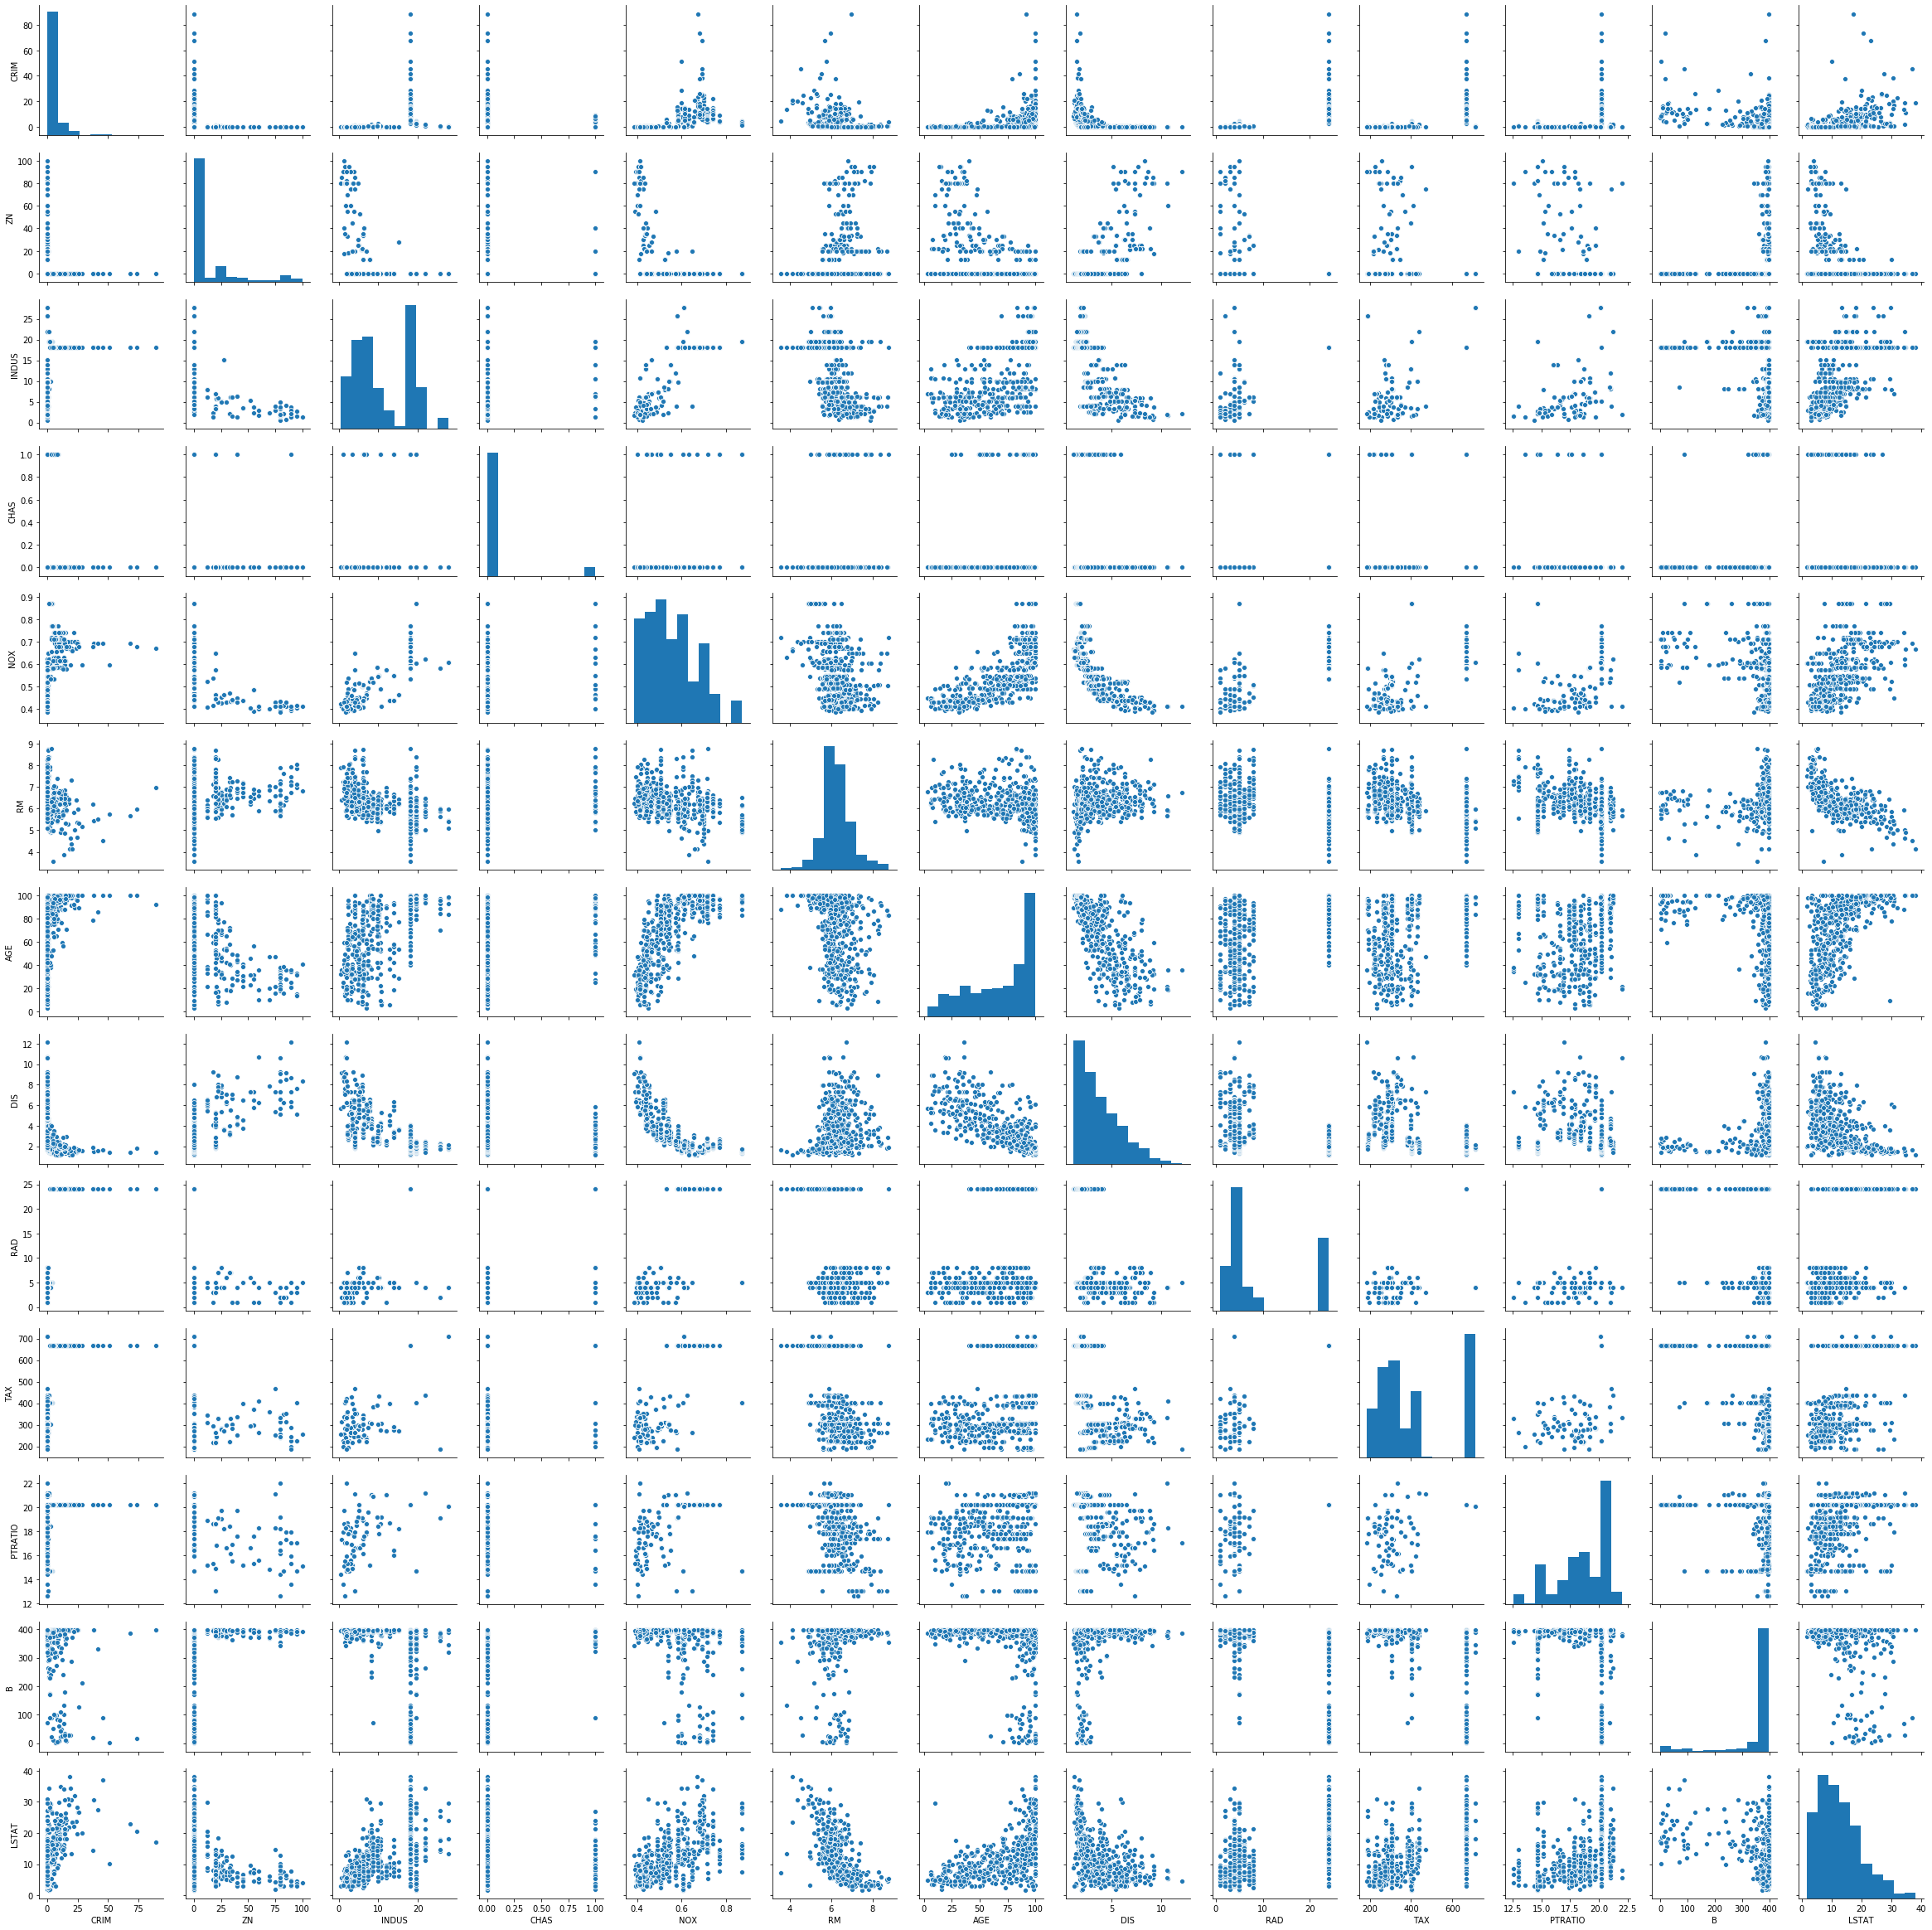

In [15]:
plt.figure(figsize=(20,20))
sns.pairplot(df_X)

In [16]:
sc=StandardScaler()

In [23]:
X=sc.fit_transform(df_X)
y=sc.fit_transform(target.reshape(-1,1))

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=455)

In [31]:
rfr=RandomForestRegressor(oob_score=True)

In [33]:
rfr.fit(x_train,y_train.ravel())

RandomForestRegressor(oob_score=True)

In [34]:
rfr.oob_score_

0.8415538806665472

In [47]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
grid_param={
    'max_depth':range(2,10),
    'max_features':['auto','log2'],
    'n_estimators':[50,100,150,200,250,300,400],
    'max_samples':[0.2,0.4,0.6,0.8]
}

In [59]:
grid_search=GridSearchCV(rfr,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [60]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2240 out of 2240 | elapsed:  5.9min finished
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'max_features': ['auto', 'log2'],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 400]},
             verbose=3)

In [61]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_samples': 0.8,
 'n_estimators': 50}

In [62]:
grid_search.best_score_

0.8698925060685555

In [63]:
from sklearn.model_selection import cross_val_score

In [65]:
score_before_tuning=cross_val_score(rfr,x_train,y_train.ravel(),cv=5).mean()
score_before_tuning

0.8499448543646452

In [81]:
rfr1=RandomForestRegressor(max_depth=9,max_features='log2',max_samples=0.8,n_estimators=50,oob_score=True,random_state=35)

In [82]:
rfr1.fit(x_train,y_train.ravel())

RandomForestRegressor(max_depth=9, max_features='log2', max_samples=0.8,
                      n_estimators=50, oob_score=True, random_state=35)

In [83]:
rfr1.oob_score_

0.8648810070504646

In [78]:
score_after_tuning=cross_val_score(rfr1,x_train,y_train.ravel(),cv=5).mean()
score_after_tuning

0.8500371977199356

In [79]:
test_score_before_tuning=rfr.score(x_test,y_test)
test_score_before_tuning

0.8477212413048427

In [84]:
test_score_after_tuning=rfr1.score(x_test,y_test)
test_score_after_tuning

0.7958514174034519